/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_35903/3230983152.py:162: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_35903/3230983152.py:162: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_35903/3230983152.py:162: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data[metric], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
/var/folders/vh/gd9x5_d94g33

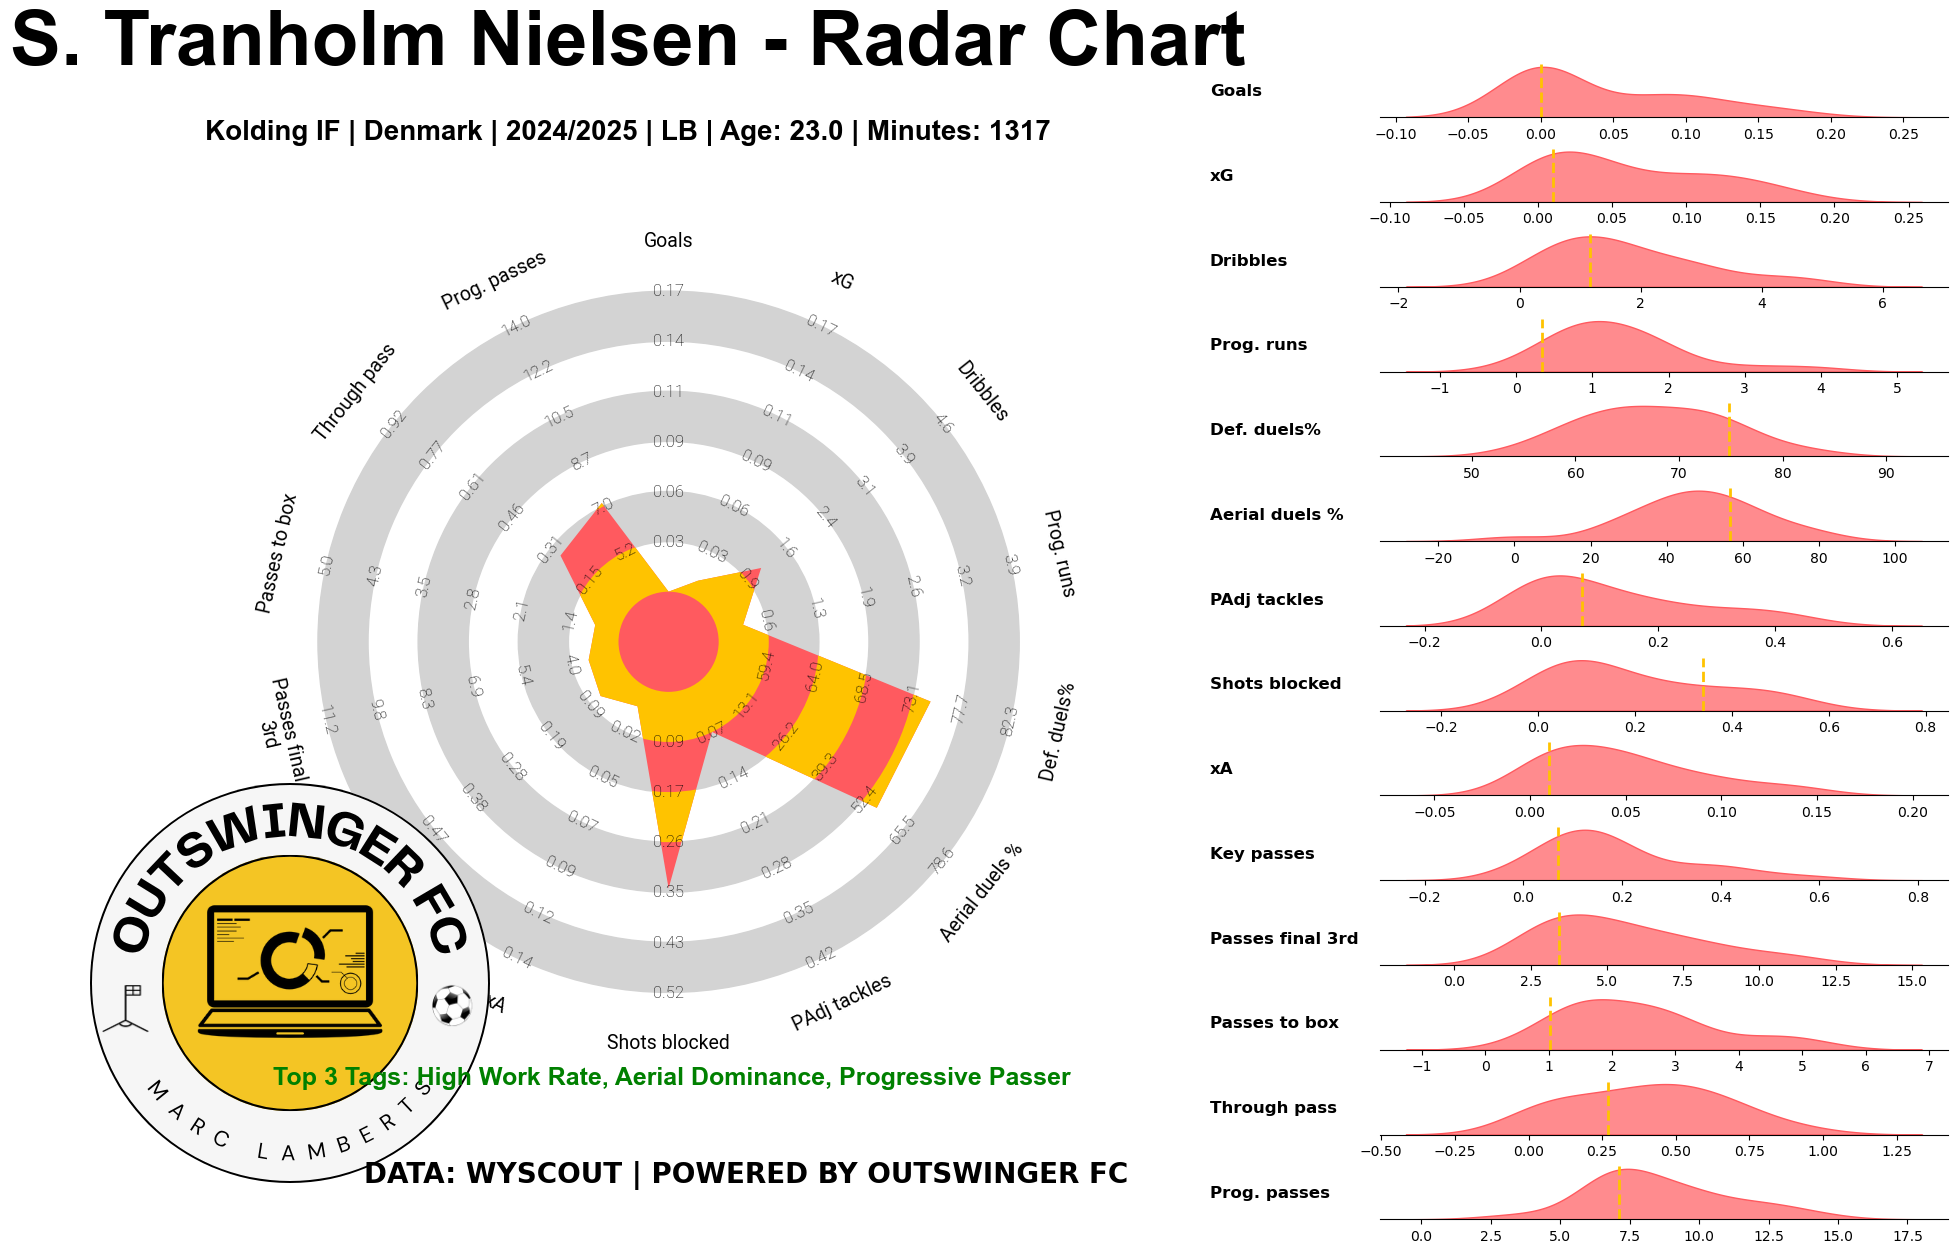

In [3]:
import pandas as pd
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image

# Load the player data, only select needed columns
file_path = '/Users/user/Downloads/Women/Denmark.xlsx'  # Replace with your file path

# Define the metric renaming map
metrics = {
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Dribbles per 90': 'Dribbles',
    'Progressive runs per 90': 'Prog. runs',
    'Defensive duels won, %': 'Def. duels%',
    'Aerial duels won, %': 'Aerial duels %',
    'PAdj Sliding tackles': 'PAdj tackles',
    'Shots blocked per 90': 'Shots blocked',
    'xA per 90': 'xA',
    'Key passes per 90': 'Key passes',
    'Passes to final third per 90': 'Passes final 3rd',
    'Passes to penalty area per 90': 'Passes to box',
    'Through passes per 90': 'Through pass',
    'Progressive passes per 90': 'Prog. passes',
}

# Columns to keep: player info + metrics keys
required_columns = ['Player', 'Team', 'Position', 'Age', 'Minutes played'] + list(metrics.keys())
data = pd.read_excel(file_path, usecols=lambda x: x in required_columns)

# Filter data
positions_to_filter = "LB"  # regex for multiple positions
filtered_data = data[(data['Minutes played'] > 500) & (data['Position'].str.contains(positions_to_filter, case=False))]

# Rename columns using metrics dict
filtered_data = filtered_data.rename(columns=metrics)

# Available metrics present in data
available_metrics = [v for v in metrics.values() if v in filtered_data.columns]

# Select player
player = 'S. Tranholm Nielsen'
player_data = filtered_data[filtered_data['Player'] == player]
if player_data.empty:
    raise ValueError(f"Player '{player}' not found in the data.")
player_row = player_data.iloc[0]

# Build radar chart input safely
params = []
low = []
high = []
player_values = []

for metric in available_metrics:
    if metric not in filtered_data.columns:
        continue
    val = player_row[metric]
    if pd.isna(val):
        continue
    params.append(metric)
    low.append(filtered_data[metric].min())
    high.append(filtered_data[metric].max())
    player_values.append(val)

# Extract dynamic player details
player_team = player_row['Team']
player_position = player_row['Position']
player_age = player_row['Age']
player_minutes = player_row['Minutes played']

# Dynamic labels
league_name = "Denmark"
season_name = "2024/2025"

# Radar setup
radar = Radar(params, low, high,
              round_int=[False] * len(params),
              num_rings=6,
              ring_width=1,
              center_circle_radius=1)

# Fonts
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

# Tags
def generate_player_tags(player_row, filtered_data):
    tags = []
    metrics_map = {
        'Goals': 'Clinical Finisher',
        'xA': 'Creative Playmaker',
        'Dribbles': 'Dribble Specialist',
        'Prog. runs': 'Ball Carrier',
        'Def. duels%': 'High Work Rate',
        'Aerial duels %': 'Aerial Dominance',
        'Prog. passes': 'Progressive Passer',
        'Passes to box': 'Playmaker',
    }
    for metric, tag in metrics_map.items():
        if metric in filtered_data.columns:
            val = player_row[metric]
            percentile = (val - filtered_data[metric].min()) / (
                filtered_data[metric].max() - filtered_data[metric].min()) * 100
            if percentile >= 75:
                tags.append(tag)
    return tags

def get_top_tags(player_row, filtered_data, metrics_map):
    scores = {}
    for metric, tag in metrics_map.items():
        if metric in filtered_data.columns:
            val = player_row[metric]
            percentile = (val - filtered_data[metric].min()) / (
                filtered_data[metric].max() - filtered_data[metric].min()) * 100
            scores[tag] = percentile
    top_tags = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    return [tag for tag, _ in top_tags]

metrics_map = {
    'Goals': 'Clinical Finisher',
    'xA': 'Creative Playmaker',
    'Dribbles': 'Dribble Specialist',
    'Prog. runs': 'Ball Carrier',
    'Def. duels%': 'High Work Rate',
    'Aerial duels %': 'Aerial Dominance',
    'Prog. passes': 'Progressive Passer',
    'Passes to box': 'Playmaker',
}

player_tags = generate_player_tags(player_row, filtered_data)
top_3_tags = get_top_tags(player_row, filtered_data, metrics_map)

# Plot
fig = plt.figure(figsize=(22, 15))
grid = plt.GridSpec(len(params), 3, width_ratios=[3, 0.3, 2], height_ratios=[1] * len(params), hspace=0.6)

# Radar Chart
ax_radar = fig.add_subplot(grid[:, 0])
radar.setup_axis(ax=ax_radar)
radar.draw_circles(ax=ax_radar, facecolor='#D3D3D3', edgecolor='#D3D3D3')
radar.draw_radar(player_values, ax=ax_radar,
                 kwargs_radar={'facecolor': '#FF5A5F'},
                 kwargs_rings={'facecolor': '#FFC300'})
radar.draw_range_labels(ax=ax_radar, fontsize=12, fontproperties=robotto_thin.prop)
radar.draw_param_labels(ax=ax_radar, fontsize=14, fontproperties=robotto_regular.prop)

# Dynamic text
fig.text(0.3, 0.88, f"{player} - Radar Chart", size=55, ha="center", color="black", fontname="Arial", weight="bold")
fig.text(0.3, 0.83, f"{player_team} | {league_name} | {season_name} | {positions_to_filter} | Age: {player_age} | Minutes: {player_minutes}",
         size=20, ha="center", color="black", fontname="Arial", weight="bold")
fig.text(0.32, 0.2, f"Top 3 Tags: {', '.join(top_3_tags)}", fontsize=18, ha="center", color="green", fontname="Arial", weight="bold")

# KDE plots
for i, metric in enumerate(params):
    ax = fig.add_subplot(grid[i, 2])
    sns.kdeplot(filtered_data[metric], ax=ax, shade=True, color='#FF5A5F', alpha=0.7)
    player_val = player_row[metric]
    ax.axvline(player_val, color='#FFC300', linestyle='--', linewidth=2)
    ax.text(-0.3, 0.5, metric, fontsize=12, fontweight='bold',
            transform=ax.transAxes, ha='left', va='center')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(left=False, bottom=True)
    ax.yaxis.set_ticks([])

# Footer & Logo
fig.text(0.18, 0.135, "DATA: WYSCOUT | POWERED BY OUTSWINGER FC", fontsize=20, fontweight="bold", color="black", ha="left")
logo_path = '/Users/user/Downloads/Outswinger FC.png'
logo_img = Image.open(logo_path)
logo_img_resized = logo_img.resize((500, 500))
logo_img_resized = mpimg.pil_to_array(logo_img_resized)
fig.figimage(logo_img_resized, 40, 20, zorder=1, alpha=1)

# Save image
output_path = f"/Users/user/Downloads/{player}_performance_with_dynamic_title.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
